In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scvelo as scv

import test.utils as utils

In [2]:
#!pip install scvelo
#!pip install anndata
#!pip install scanpy
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
# %ls *.h5ad

In [4]:
adata =ad.read("data/adata_4_classes.h5ad")
adata

AnnData object with n_obs × n_vars = 682 × 3134
    obs: 'leiden', 'clusters'
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_allele_1', 'sum_allele_2', 'ratio_allele_1', 'ratio_allele_2', 'ratio_sum_allele_1', 'ratio_sum_allele_2', 'ratio_mean_allele_1', 'ratio_mean_allele_2', 'ratio_std_allele_1', 'ratio_std_allele_2', 'p_value', 'max_count_allele_1', 'max_count_allele_2', 'class_label', 'predicted_class'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'aggregate', 'ratio_allele_1', 'ratio_allele_2', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,ratio_sum_allele_2,ratio_mean_allele_1,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value,max_count_allele_1,max_count_allele_2,class_label,predicted_class
ENSMUSG00000000001,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,360.708822,0.471101,0.528899,0.157535,0.157535,0.001223,43.0,46.0,0,0
ENSMUSG00000000049,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,34.500000,0.460938,0.539062,0.498447,0.498447,1.000000,4.0,3.0,3,3
ENSMUSG00000000088,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,331.394683,0.514084,0.485916,0.151797,0.151797,0.089846,45.0,49.0,0,3
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,2.0,2,2
ENSMUSG00000000184,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,324.052256,0.524850,0.475150,0.144606,0.144606,0.020103,205.0,180.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,2,2
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,2,2
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0,2,2
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,2,2


In [6]:
adata.obs['n_counts'] = adata.X.sum(1)
adata.var['UMI_counts_per_gene'] = adata.X.sum(0)

adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.var['UMI_log_counts_per_gene'] = np.log(adata.var['UMI_counts_per_gene'])

In [7]:
pd.crosstab(adata.var['class_label'], adata.var['class_label'])

class_label,0,1,2,3
class_label,,,,
0,1264,0,0,0
1,0,48,0,0
2,0,0,497,0
3,0,0,0,1325


In [8]:
adata2 = adata.transpose()
adata2

AnnData object with n_obs × n_vars = 3134 × 682
    obs: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_allele_1', 'sum_allele_2', 'ratio_allele_1', 'ratio_allele_2', 'ratio_sum_allele_1', 'ratio_sum_allele_2', 'ratio_mean_allele_1', 'ratio_mean_allele_2', 'ratio_std_allele_1', 'ratio_std_allele_2', 'p_value', 'max_count_allele_1', 'max_count_allele_2', 'class_label', 'predicted_class', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene'
    var: 'leiden', 'clusters', 'n_counts', 'log_counts'
    uns: 'leiden', 'neighbors', 'umap'
    varm: 'X_pca', 'X_umap'
    layers: 'aggregate', 'ratio_allele_1', 'ratio_allele_2', 'spliced', 'unspliced'
    varp: 'connectivities', 'distances'

In [9]:
adata.var["class_label"] = [str(x) for x in adata.var["class_label"]]
adata2.obs["class_label"] = [str(x) for x in adata2.obs["class_label"]]

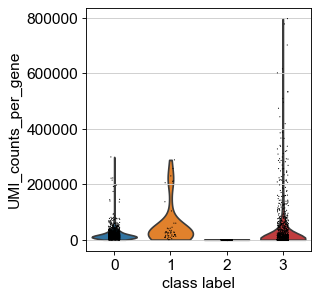

In [10]:
sc.pl.violin(adata2, keys="UMI_counts_per_gene", groupby="class_label")

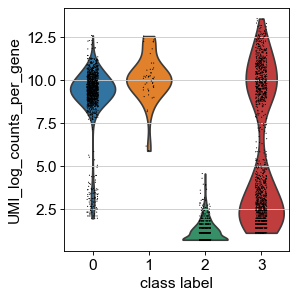

In [11]:
sc.pl.violin(adata2, keys="UMI_log_counts_per_gene", groupby="class_label")

In [12]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,...,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value,max_count_allele_1,max_count_allele_2,class_label,predicted_class,UMI_counts_per_gene,UMI_log_counts_per_gene
ENSMUSG00000000001,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,...,0.528899,0.157535,0.157535,0.001223,43.0,46.0,0,0,18980.0,9.851141
ENSMUSG00000000049,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,...,0.539062,0.498447,0.498447,1.000000,4.0,3.0,3,3,94.0,4.543295
ENSMUSG00000000088,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,...,0.485916,0.151797,0.151797,0.089846,45.0,49.0,0,3,14542.0,9.584796
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.0,2.0,2,2,4.0,1.386294
ENSMUSG00000000184,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,...,0.475150,0.144606,0.144606,0.020103,205.0,180.0,0,3,69208.0,11.144872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.0,2,2,2.0,0.693147
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.0,2,2,2.0,0.693147
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,2.0,0.0,2,2,6.0,1.791759
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.0,2,2,2.0,0.693147


In [13]:
adata2.write("tmp_file.h5ad")
adata2  = ad.read("tmp_file.h5ad")
adata2

AnnData object with n_obs × n_vars = 3134 × 682
    obs: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_allele_1', 'sum_allele_2', 'ratio_allele_1', 'ratio_allele_2', 'ratio_sum_allele_1', 'ratio_sum_allele_2', 'ratio_mean_allele_1', 'ratio_mean_allele_2', 'ratio_std_allele_1', 'ratio_std_allele_2', 'p_value', 'max_count_allele_1', 'max_count_allele_2', 'class_label', 'predicted_class', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene'
    var: 'leiden', 'clusters', 'n_counts', 'log_counts'
    uns: 'class_label_colors', 'leiden', 'neighbors', 'umap'
    varm: 'X_pca', 'X_umap'
    layers: 'aggregate', 'ratio_allele_1', 'ratio_allele_2', 'spliced', 'unspliced'
    varp: 'connectivities', 'distances'

In [14]:
#sc.pl.scatter(adata2.obs['ratio_std_allele_1'],
#              adata2.obs['UMI_log_counts_per_gene'],
#              color=adata2.obs['class_label'], 
#             use_raw=False)

In [15]:
adata.var.index

Index(['ENSMUSG00000000001', 'ENSMUSG00000000049', 'ENSMUSG00000000088',
       'ENSMUSG00000000120', 'ENSMUSG00000000184', 'ENSMUSG00000000295',
       'ENSMUSG00000000303', 'ENSMUSG00000000326', 'ENSMUSG00000000339',
       'ENSMUSG00000000346',
       ...
       'ENSMUSG00000084146', 'ENSMUSG00000085051', 'ENSMUSG00000087278',
       'ENSMUSG00000089617', 'ENSMUSG00000097824', 'ENSMUSG00000100620',
       'ENSMUSG00000103811', 'ENSMUSG00000112500', 'ENSMUSG00000114922',
       'ENSMUSG00000115141'],
      dtype='object', length=3134)

In [16]:
adata2

AnnData object with n_obs × n_vars = 3134 × 682
    obs: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_allele_1', 'sum_allele_2', 'ratio_allele_1', 'ratio_allele_2', 'ratio_sum_allele_1', 'ratio_sum_allele_2', 'ratio_mean_allele_1', 'ratio_mean_allele_2', 'ratio_std_allele_1', 'ratio_std_allele_2', 'p_value', 'max_count_allele_1', 'max_count_allele_2', 'class_label', 'predicted_class', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene'
    var: 'leiden', 'clusters', 'n_counts', 'log_counts'
    uns: 'class_label_colors', 'leiden', 'neighbors', 'umap'
    varm: 'X_pca', 'X_umap'
    layers: 'aggregate', 'ratio_allele_1', 'ratio_allele_2', 'spliced', 'unspliced'
    varp: 'connectivities', 'distances'

In [17]:
adata2.uns['class_label_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728'], dtype=object)

In [18]:
color_label = []
for label in adata2.obs['class_label']:
    if label=='0':
        color_label.append('#1f77b4')
    elif label=='1':
        color_label.append('#ff7f0e')
    elif label=='2':
        color_label.append('#279e68')
    else:
        color_label.append('#d62728')
adata.var['class_label_colors'] = color_label

In [19]:
adata2 = adata.transpose()
adata2

AnnData object with n_obs × n_vars = 3134 × 682
    obs: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_allele_1', 'sum_allele_2', 'ratio_allele_1', 'ratio_allele_2', 'ratio_sum_allele_1', 'ratio_sum_allele_2', 'ratio_mean_allele_1', 'ratio_mean_allele_2', 'ratio_std_allele_1', 'ratio_std_allele_2', 'p_value', 'max_count_allele_1', 'max_count_allele_2', 'class_label', 'predicted_class', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene', 'class_label_colors'
    var: 'leiden', 'clusters', 'n_counts', 'log_counts'
    uns: 'leiden', 'neighbors', 'umap', 'class_label_colors'
    varm: 'X_pca', 'X_umap'
    layers: 'aggregate', 'ratio_allele_1', 'ratio_allele_2', 'spliced', 'unspliced'
    varp: 'connectivities', 'distances'

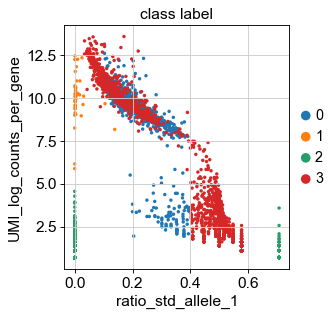

In [20]:
sc.pl.scatter(adata2, x='ratio_std_allele_1', y='UMI_log_counts_per_gene', color='class_label')

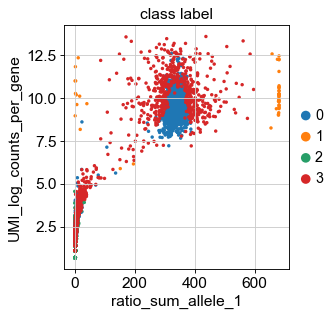

In [21]:
sc.pl.scatter(adata2, x='ratio_sum_allele_1', y='UMI_log_counts_per_gene', color='class_label')

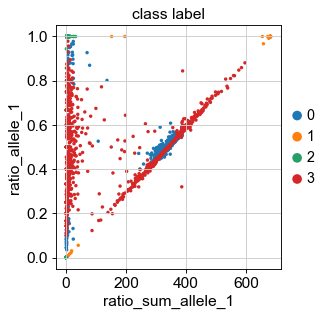

In [22]:
sc.pl.scatter(adata2, x='ratio_sum_allele_1', y='ratio_allele_1', color='class_label')

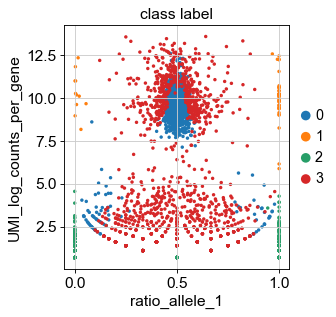

In [23]:
sc.pl.scatter(adata2, x='ratio_allele_1', y='UMI_log_counts_per_gene', color='class_label')

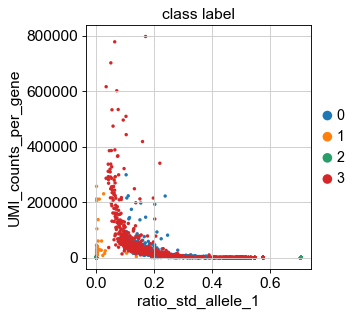

In [24]:
sc.pl.scatter(adata2, x='ratio_std_allele_1', y='UMI_counts_per_gene', color='class_label')

In [25]:
# %ls 

In [26]:
adata3 = ad.read("data/annotated_adata_without_filtering.h5ad")
adata3

AnnData object with n_obs × n_vars = 682 × 23270
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_c57', 'sum_cast', 'sum_biallelic', 'max_count_allele_1', 'max_count_allele_2', 'sum_allele_1', 'sum_allele_2'
    layers: 'spliced', 'unspliced'

In [27]:
df= pd.read_csv("data/all_prediction.csv", sep=";", index_col=0)
df = df[['predict_label']]
df.head()

,predict_label
ENSMUSG00000000001,3
ENSMUSG00000000028,0
ENSMUSG00000000037,3
ENSMUSG00000000049,3
ENSMUSG00000000056,0


In [28]:
adata3.var_names = adata3.var['gene_name'].tolist()
adata3.var['predict_label'] = df['predict_label'].tolist()
adata3.var["predict_label"] = [str(x) for x in adata3.var["predict_label"]]
adata3.var_names_make_unique()

In [29]:
df['predict_label']

ENSMUSG00000000001    3
ENSMUSG00000000028    0
ENSMUSG00000000037    3
ENSMUSG00000000049    3
ENSMUSG00000000056    0
                     ..
ENSMUSG00000115595    2
ENSMUSG00000115637    2
ENSMUSG00000115643    2
ENSMUSG00000115725    2
ENSMUSG00000115811    2
Name: predict_label, Length: 23270, dtype: int64

In [30]:
adata3.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_c57,sum_cast,sum_biallelic,max_count_allele_1,max_count_allele_2,sum_allele_1,sum_allele_2,predict_label
Gnai3,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,18980.0,43.0,46.0,8956.0,10024.0,3
Cdc45,Cdc45,16,autosome,nuclear,other protein,1175.0,1092.0,2267.0,23.0,29.0,1175.0,1092.0,0
Scml2,Scml2,X,X,nuclear,other protein,87.0,0.0,87.0,4.0,0.0,87.0,0.0,3
Apoh,Apoh,11,autosome,nuclear,other protein,46.0,48.0,94.0,4.0,3.0,46.0,48.0,3
Narf,Narf,11,autosome,nuclear,other protein,551.0,556.0,1107.0,7.0,11.0,551.0,556.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rps12-ps2,Rps12-ps2,14,autosome,nuclear,Ribosomal protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Gm30970,Gm30970,14,autosome,nuclear,other protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Gm49011,Gm49011,14,autosome,nuclear,other protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4930572G02Rik,4930572G02Rik,14,autosome,nuclear,other protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [31]:
adata3.obs['n_counts'] = adata3.X.sum(1)
adata3.var['UMI_counts_per_gene'] = adata3.X.sum(0)

adata3.obs['log_counts'] = np.log(adata3.obs['n_counts'])
adata3.var['UMI_log_counts_per_gene'] = np.log(adata3.var['UMI_counts_per_gene'])
adata3.var['UMI_log1p_counts_per_gene'] = np.log1p(adata3.var['UMI_counts_per_gene'])

adata4 = adata3.transpose()
adata4

AnnData object with n_obs × n_vars = 23270 × 682
    obs: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_c57', 'sum_cast', 'sum_biallelic', 'max_count_allele_1', 'max_count_allele_2', 'sum_allele_1', 'sum_allele_2', 'predict_label', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene', 'UMI_log1p_counts_per_gene'
    var: 'n_counts', 'log_counts'
    layers: 'spliced', 'unspliced'

In [32]:
adata3.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_c57,sum_cast,sum_biallelic,max_count_allele_1,max_count_allele_2,sum_allele_1,sum_allele_2,predict_label,UMI_counts_per_gene,UMI_log_counts_per_gene,UMI_log1p_counts_per_gene
Gnai3,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,18980.0,43.0,46.0,8956.0,10024.0,3,18980.0,9.851141,9.851193
Cdc45,Cdc45,16,autosome,nuclear,other protein,1175.0,1092.0,2267.0,23.0,29.0,1175.0,1092.0,0,NaN,NaN,NaN
Scml2,Scml2,X,X,nuclear,other protein,87.0,0.0,87.0,4.0,0.0,87.0,0.0,3,NaN,NaN,NaN
Apoh,Apoh,11,autosome,nuclear,other protein,46.0,48.0,94.0,4.0,3.0,46.0,48.0,3,94.0,4.543295,4.553877
Narf,Narf,11,autosome,nuclear,other protein,551.0,556.0,1107.0,7.0,11.0,551.0,556.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rps12-ps2,Rps12-ps2,14,autosome,nuclear,Ribosomal protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN
Gm30970,Gm30970,14,autosome,nuclear,other protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN
Gm49011,Gm49011,14,autosome,nuclear,other protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,-inf,0.000000
4930572G02Rik,4930572G02Rik,14,autosome,nuclear,other protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN


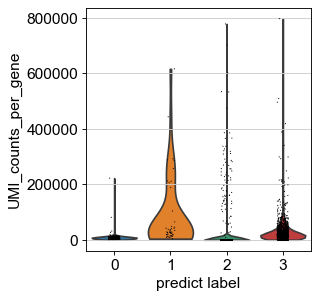

In [33]:

sc.pl.violin(adata4, keys="UMI_counts_per_gene", groupby="predict_label")


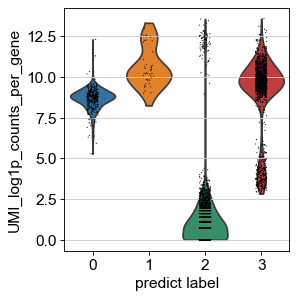

In [34]:

sc.pl.violin(adata4, keys="UMI_log1p_counts_per_gene", groupby="predict_label")



In [35]:
adata4

AnnData object with n_obs × n_vars = 23270 × 682
    obs: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_c57', 'sum_cast', 'sum_biallelic', 'max_count_allele_1', 'max_count_allele_2', 'sum_allele_1', 'sum_allele_2', 'predict_label', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene', 'UMI_log1p_counts_per_gene'
    var: 'n_counts', 'log_counts'
    uns: 'predict_label_colors'
    layers: 'spliced', 'unspliced'

In [36]:
pd.crosstab(adata4.obs['predict_label'], adata4.obs['predict_label'])

predict_label,0,1,2,3
predict_label,,,,
0,7088,0,0,0
1,0,151,0,0
2,0,0,8688,0
3,0,0,0,7343


# imprinted genes :

In [37]:
imprinted = adata3[:,adata3.var['predict_label']=='1'].copy()
imprinted

AnnData object with n_obs × n_vars = 682 × 151
    obs: 'n_counts', 'log_counts'
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_c57', 'sum_cast', 'sum_biallelic', 'max_count_allele_1', 'max_count_allele_2', 'sum_allele_1', 'sum_allele_2', 'predict_label', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene', 'UMI_log1p_counts_per_gene'
    layers: 'spliced', 'unspliced'

In [38]:
imprinted2 = imprinted[:,imprinted.var['chromosome']!='X'].copy()
imprinted2

AnnData object with n_obs × n_vars = 682 × 23
    obs: 'n_counts', 'log_counts'
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_c57', 'sum_cast', 'sum_biallelic', 'max_count_allele_1', 'max_count_allele_2', 'sum_allele_1', 'sum_allele_2', 'predict_label', 'UMI_counts_per_gene', 'UMI_log_counts_per_gene', 'UMI_log1p_counts_per_gene'
    layers: 'spliced', 'unspliced'

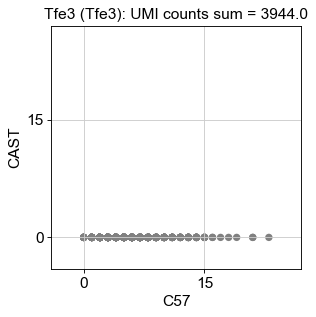

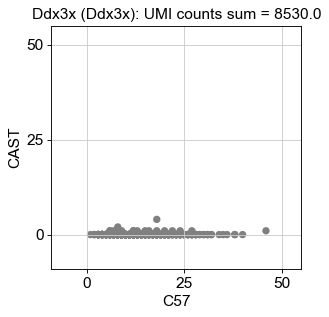

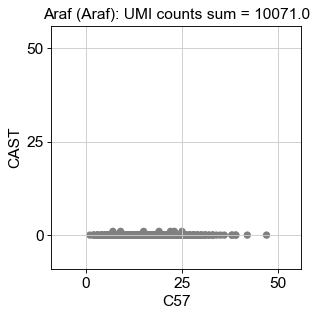

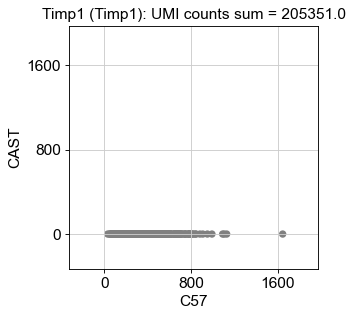

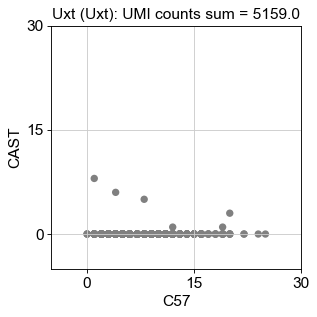

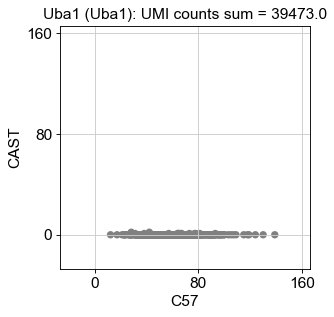

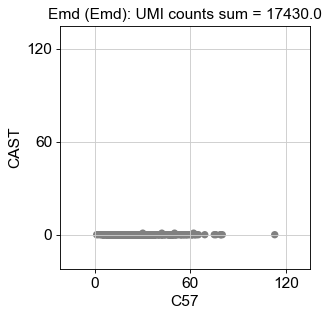

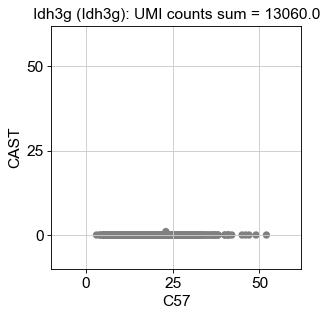

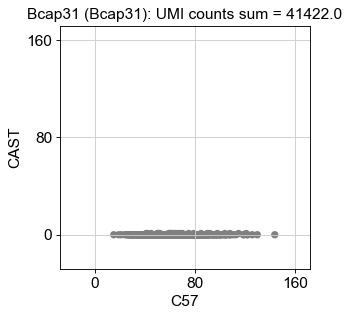

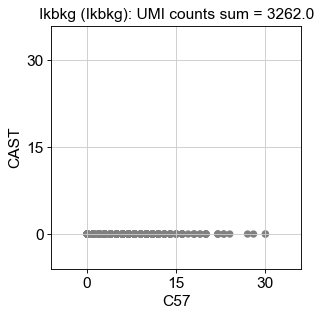

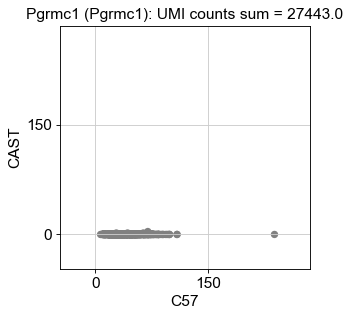

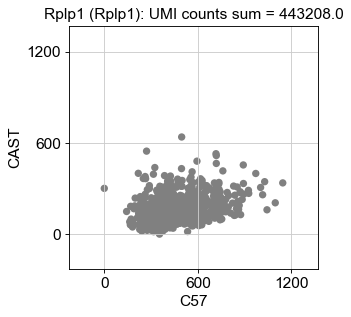

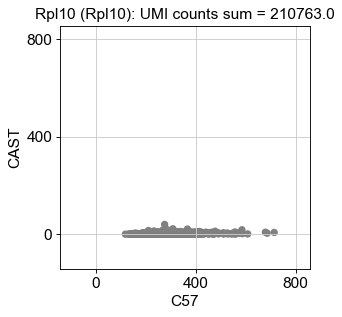

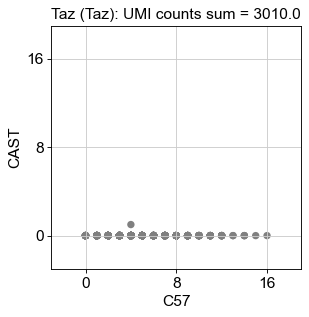

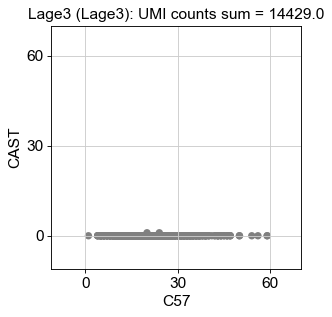

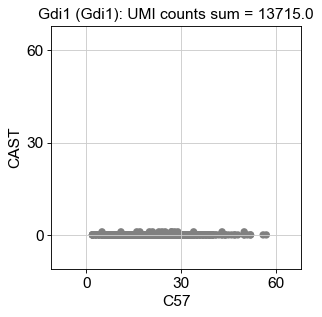

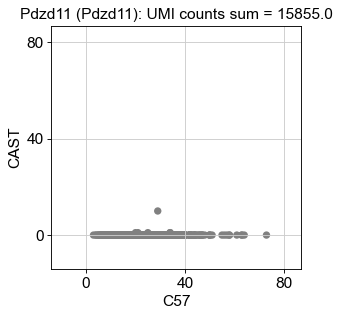

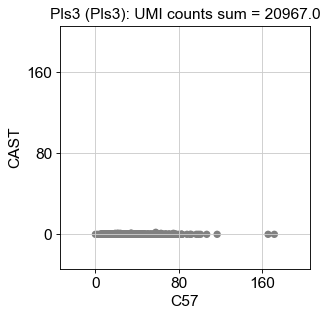

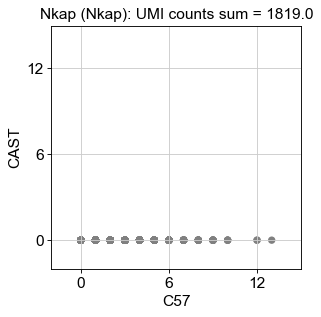

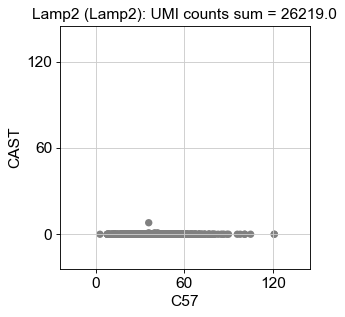

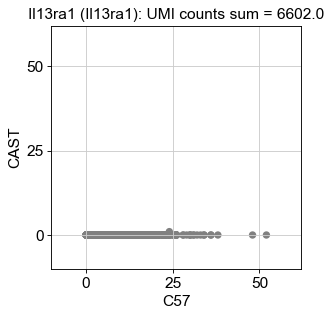

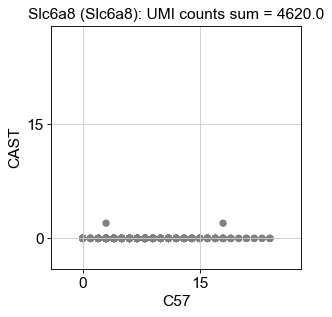

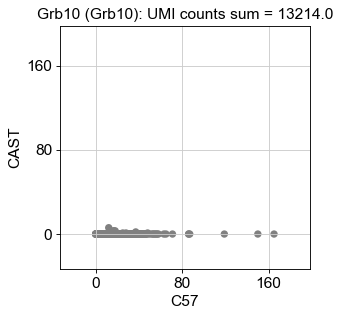

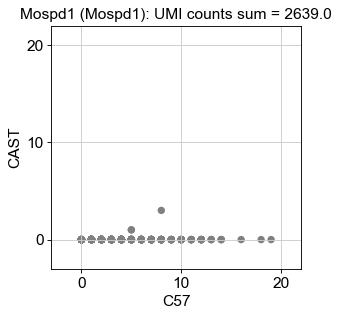

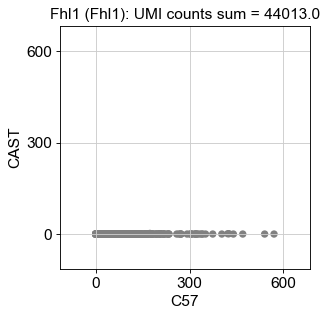

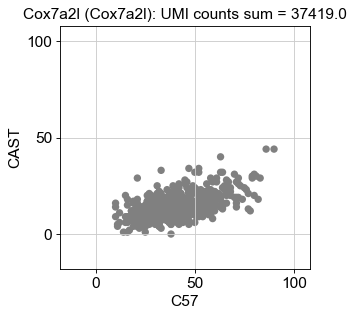

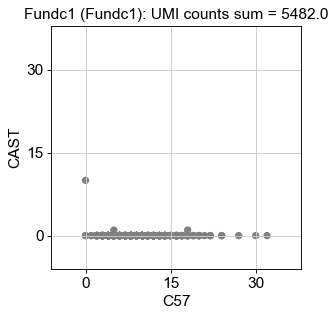

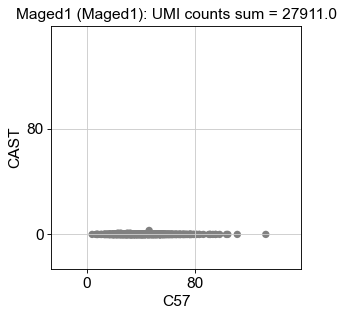

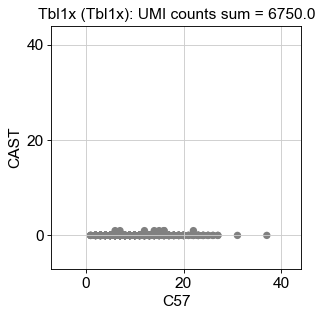

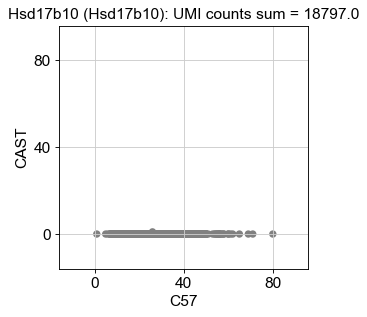

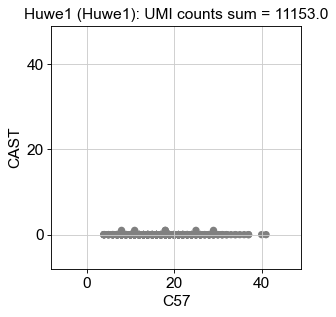

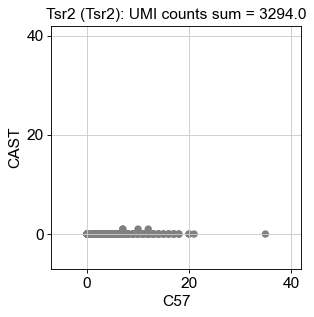

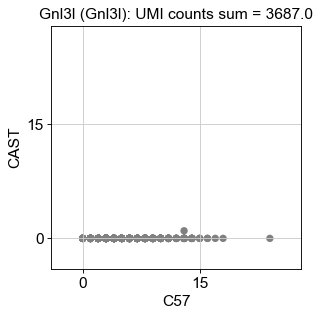

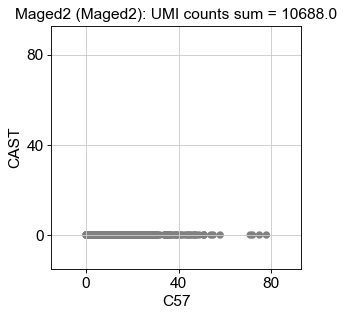

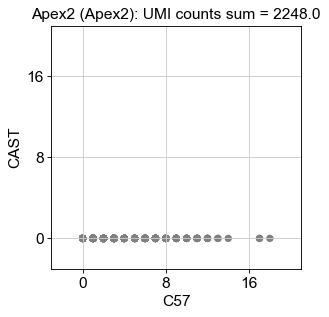

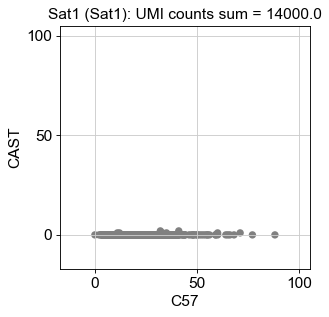

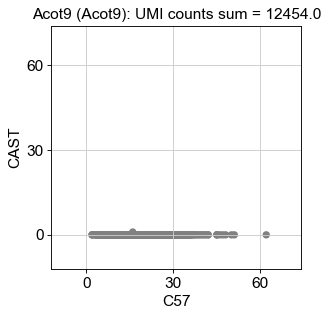

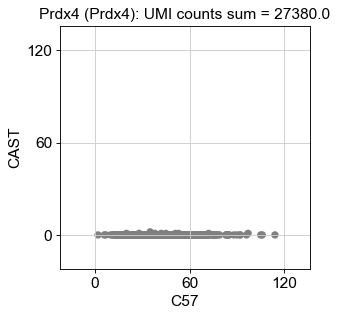

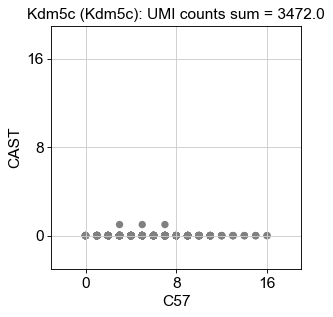

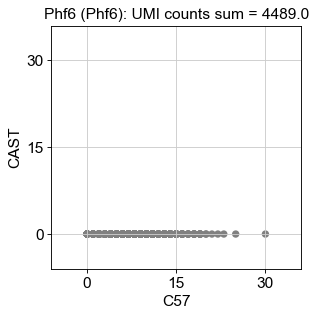

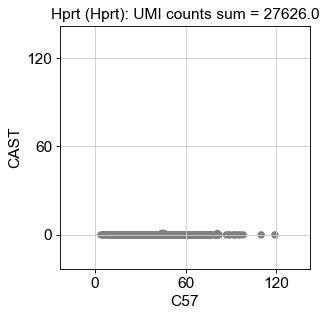

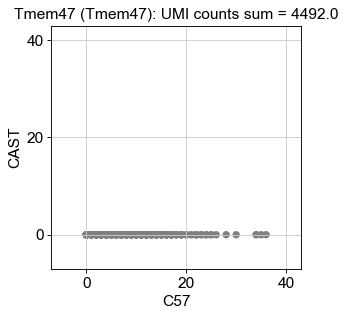

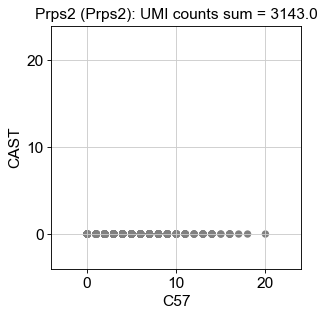

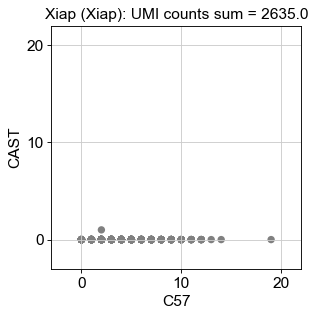

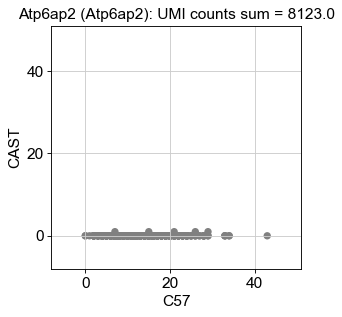

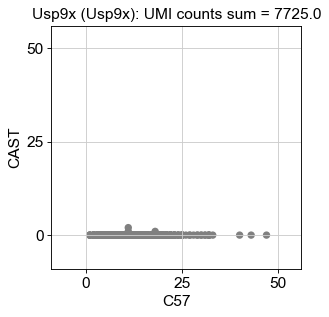

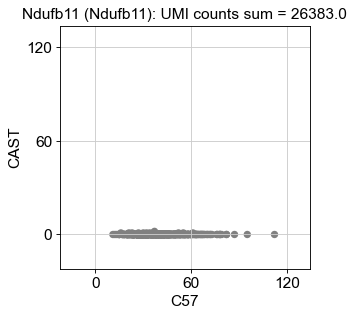

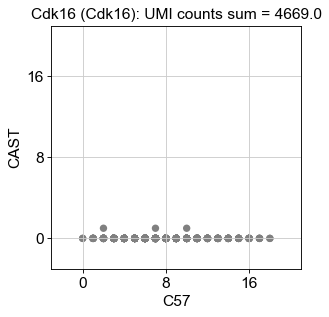

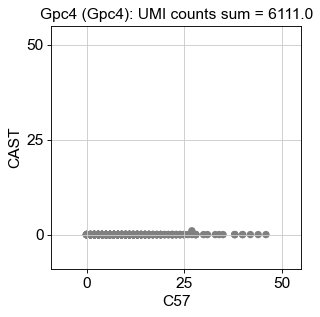

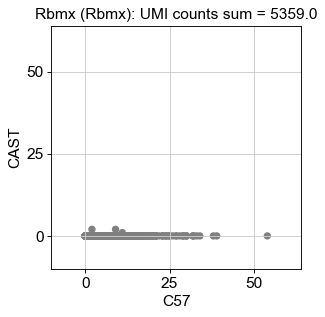

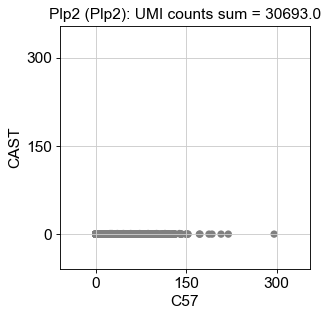

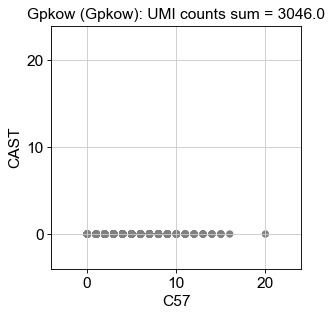

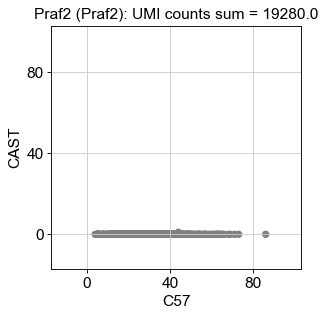

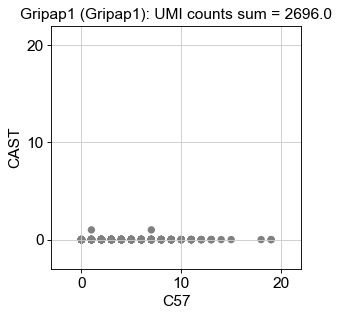

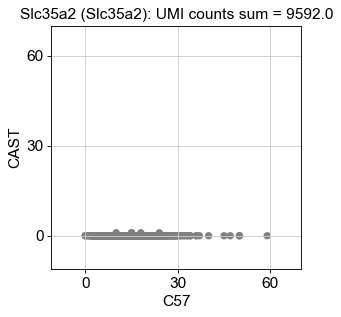

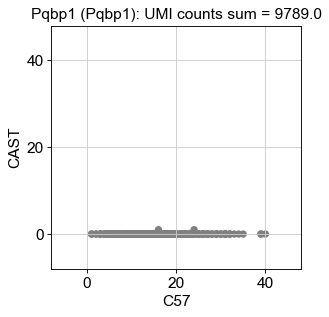

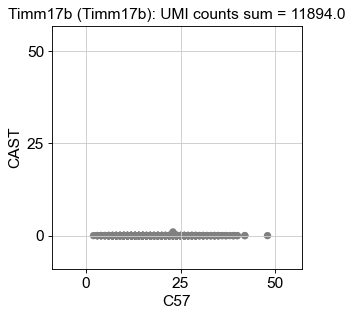

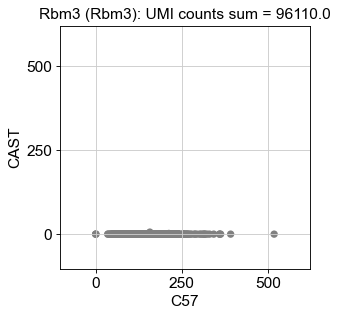

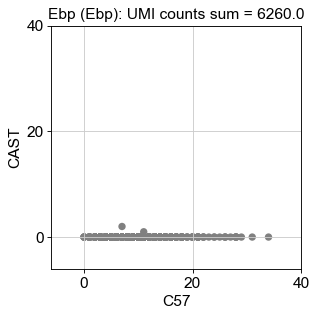

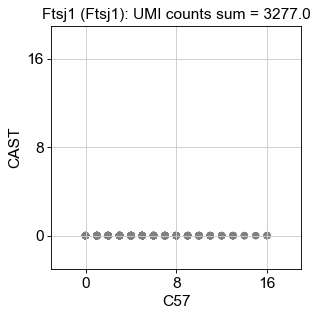

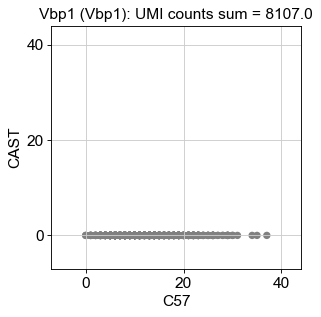

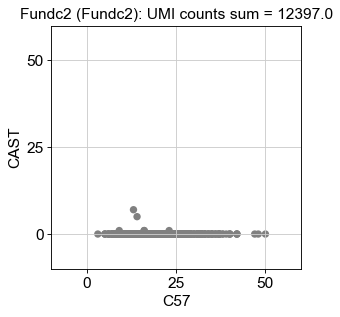

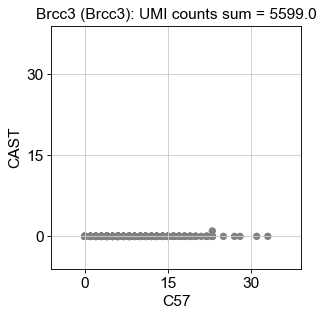

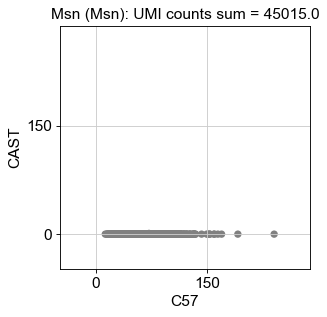

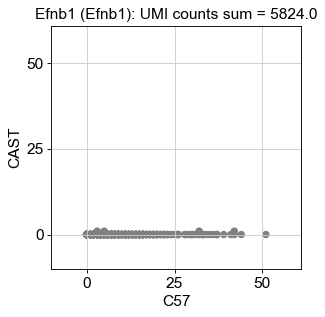

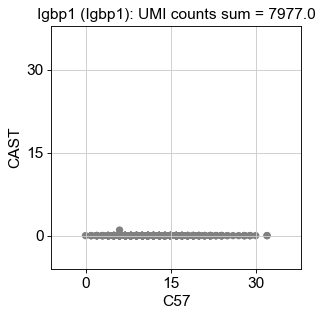

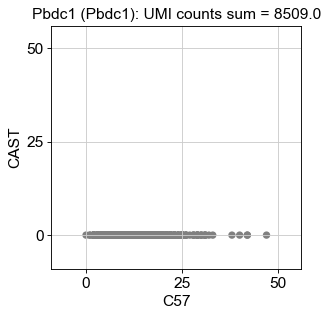

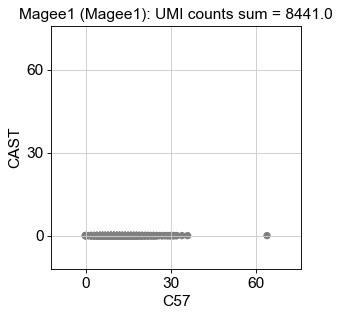

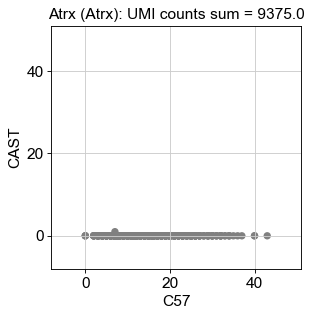

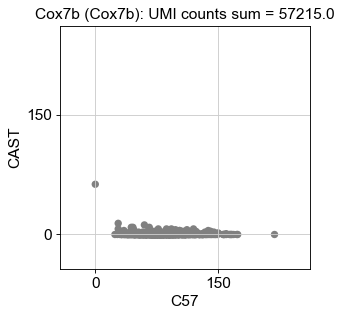

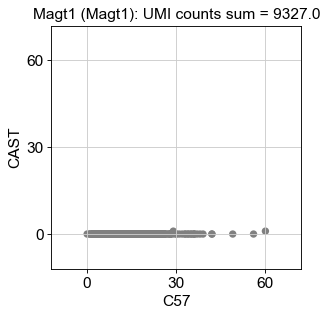

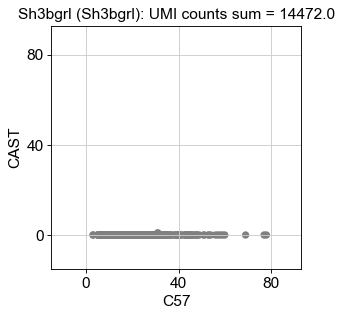

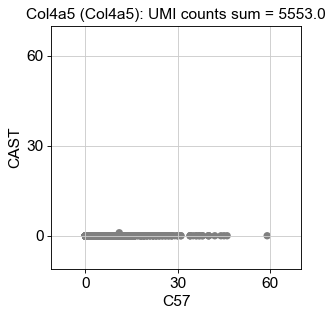

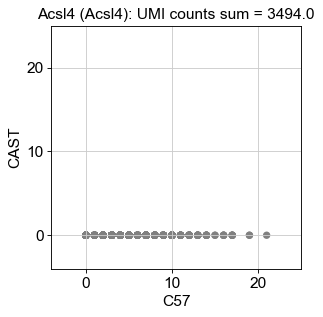

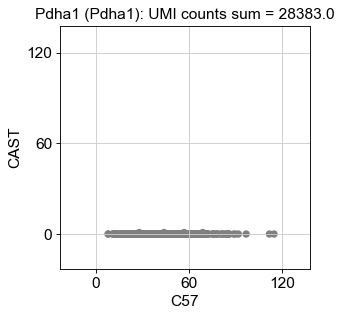

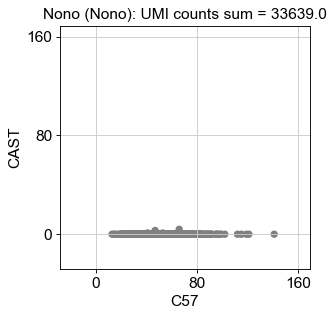

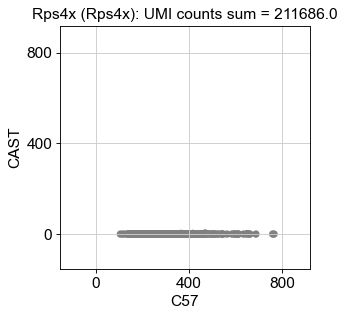

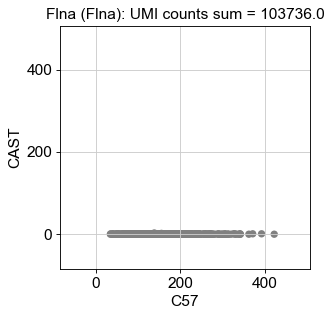

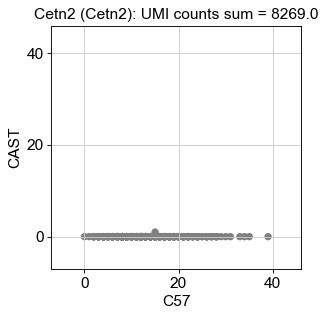

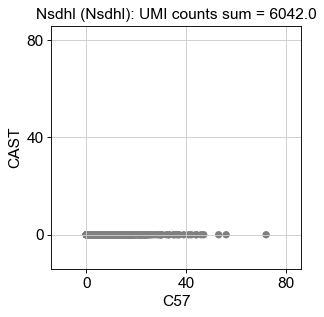

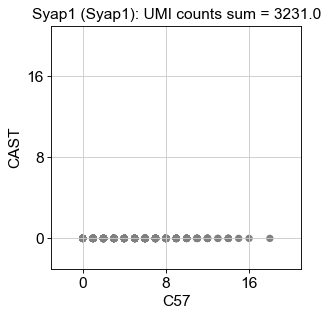

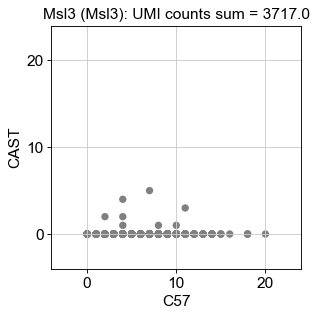

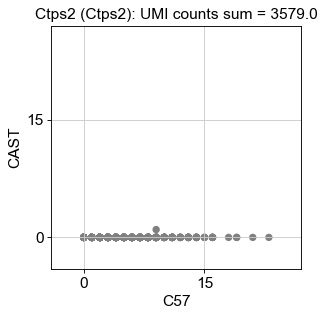

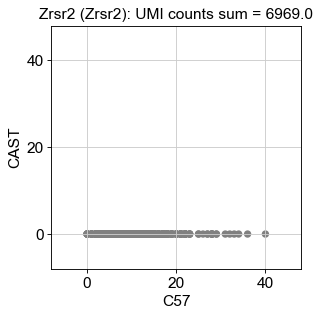

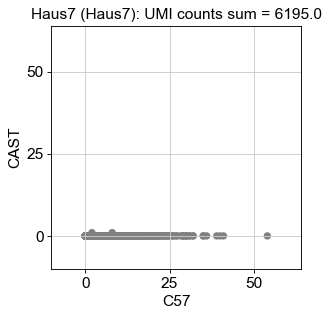

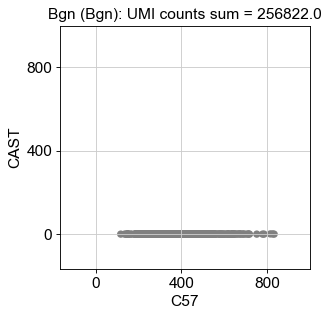

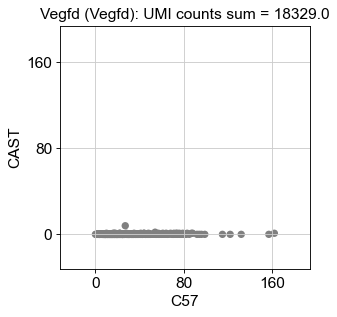

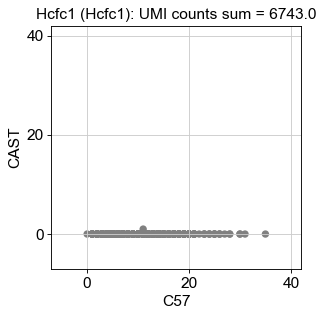

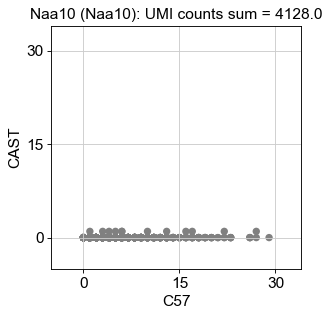

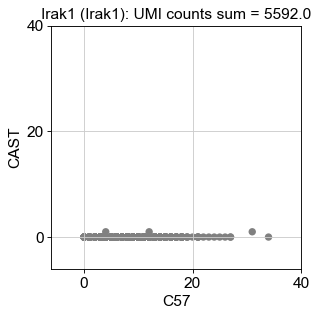

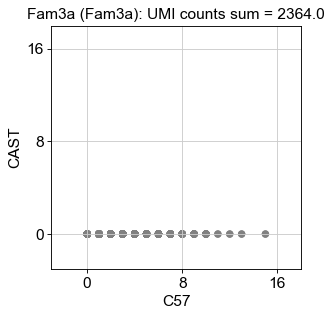

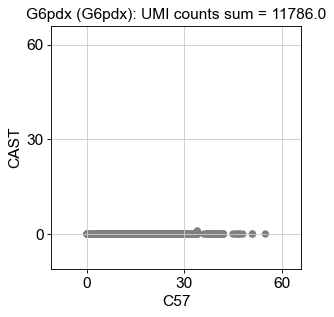

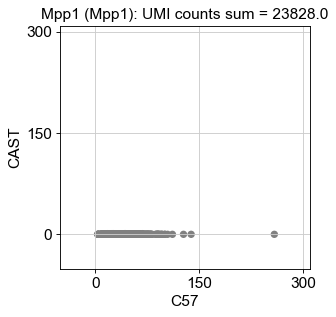

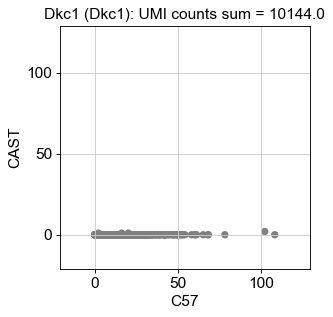

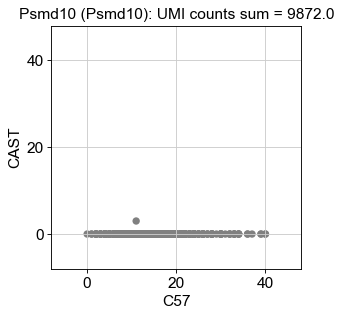

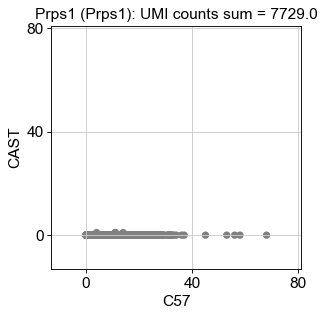

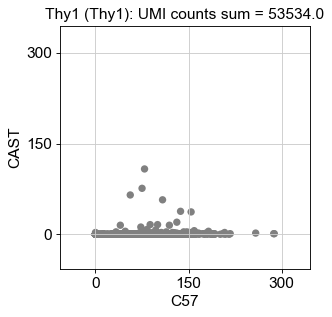

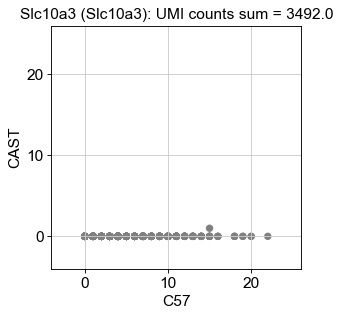

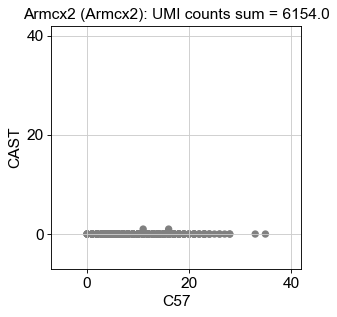

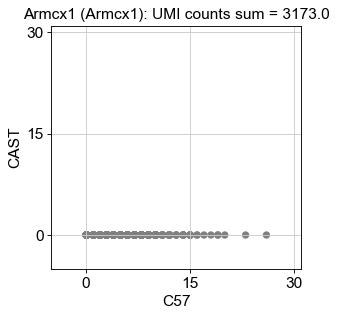

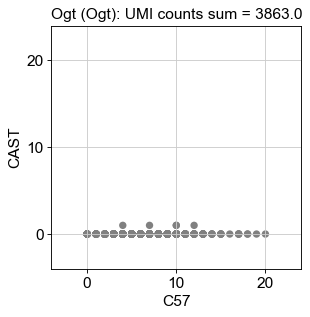

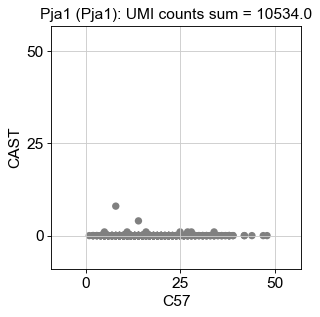

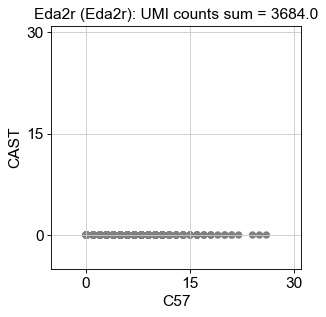

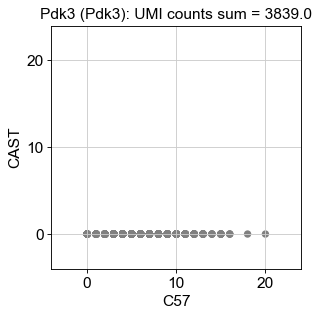

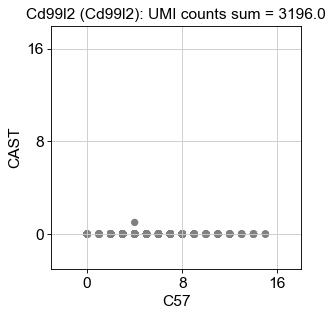

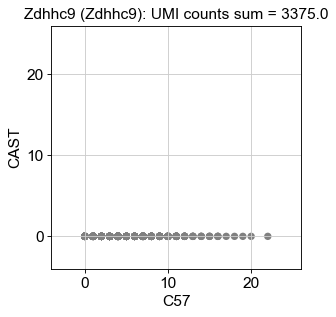

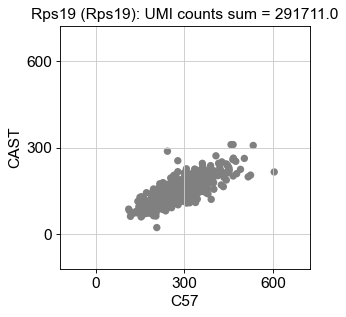

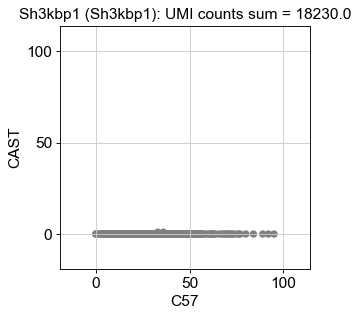

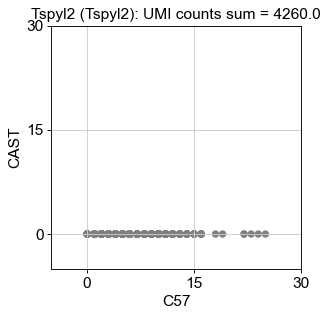

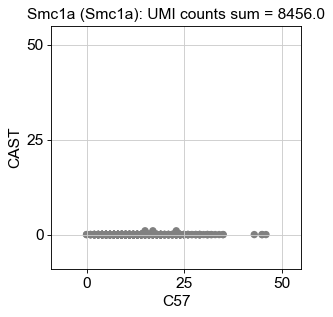

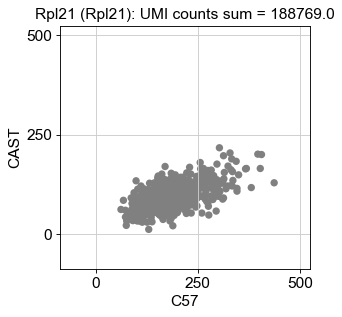

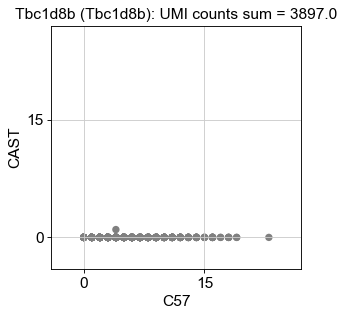

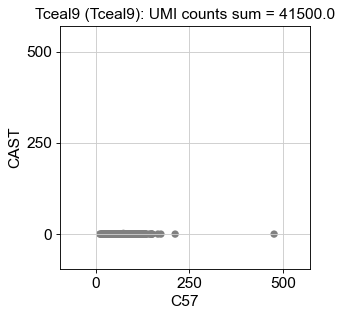

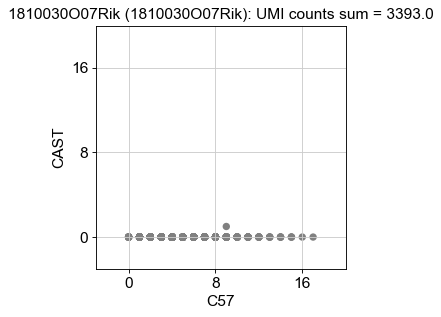

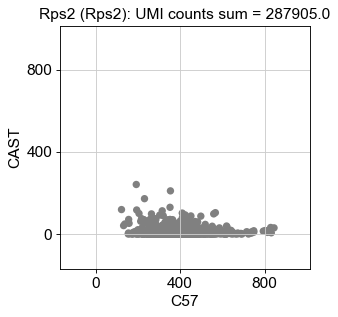

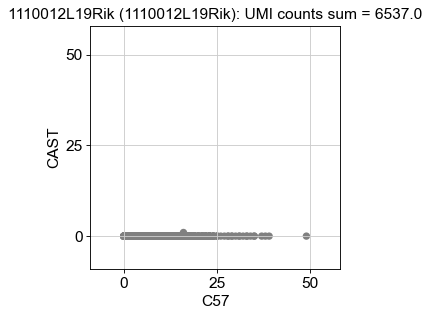

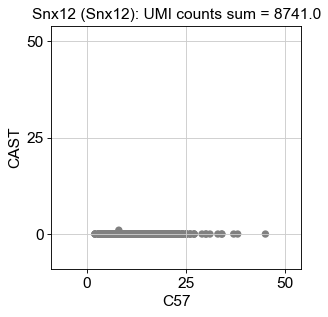

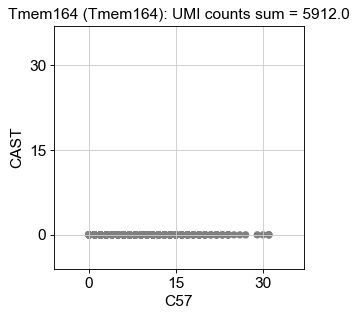

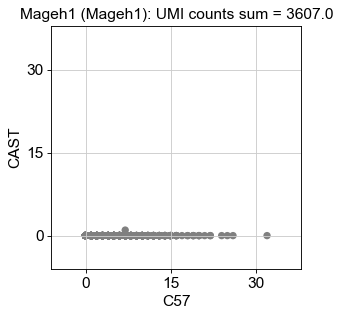

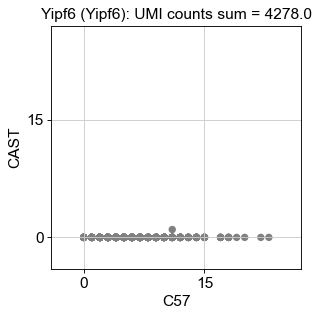

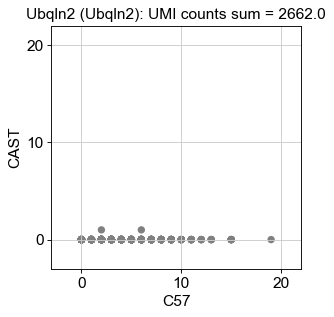

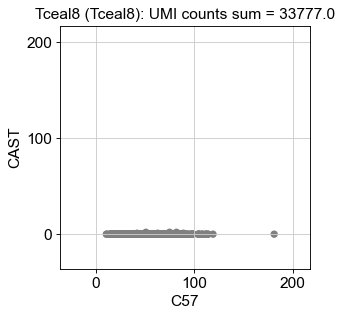

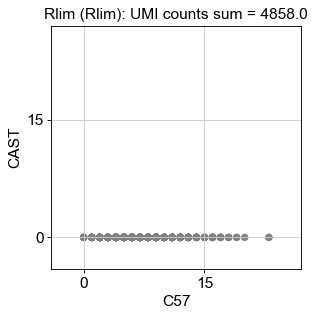

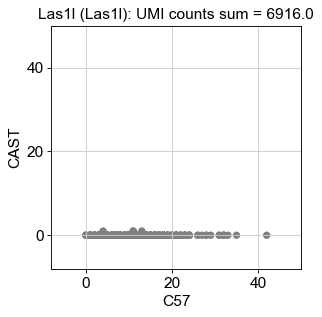

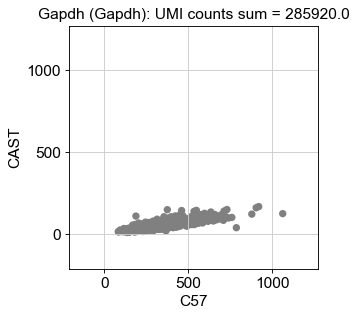

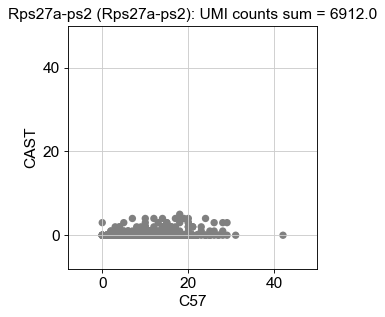

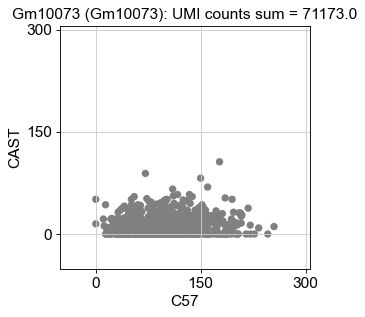

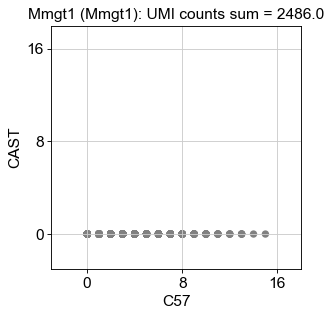

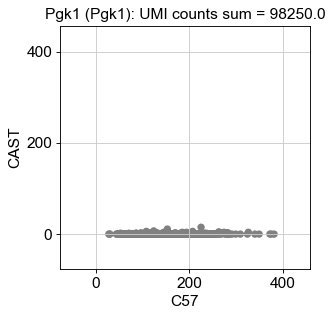

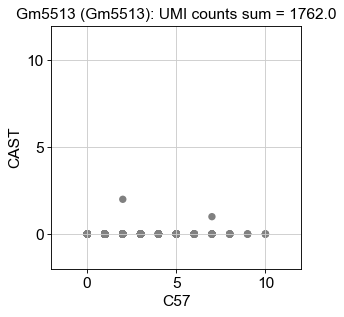

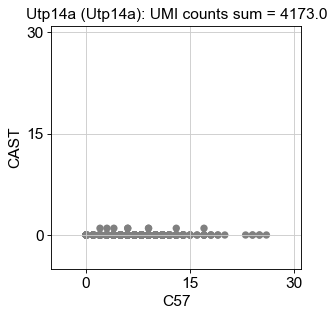

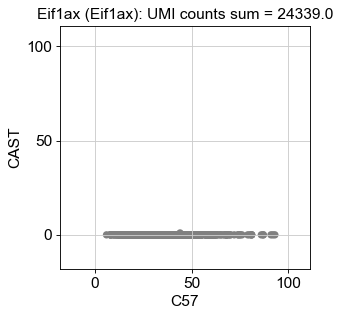

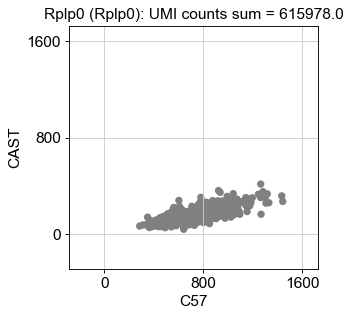

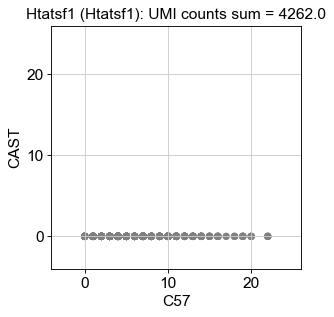

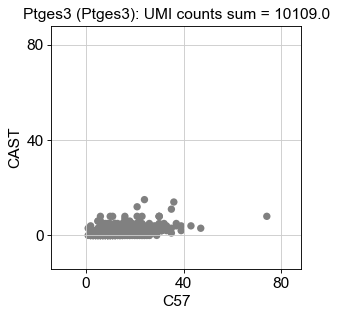

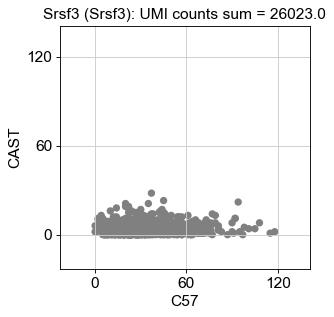

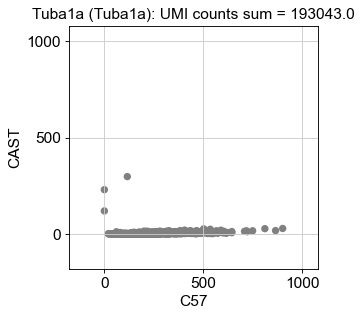

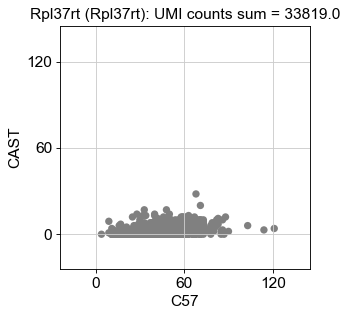

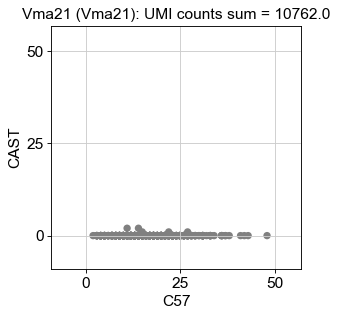

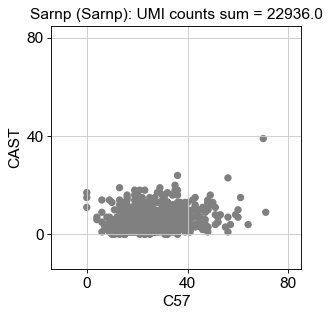

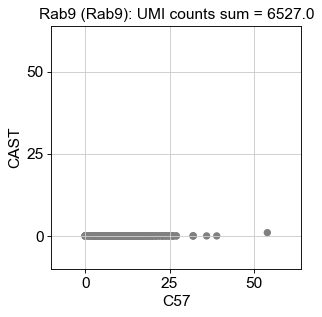

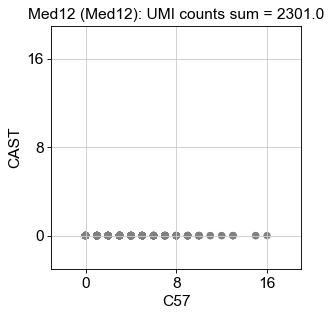

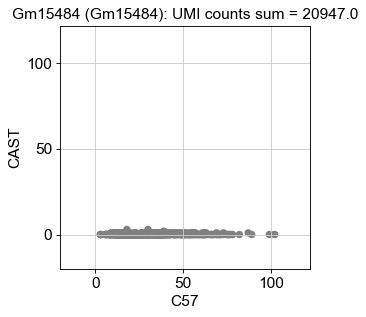

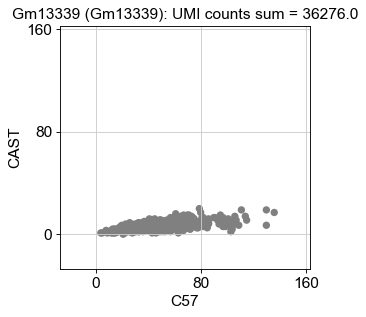

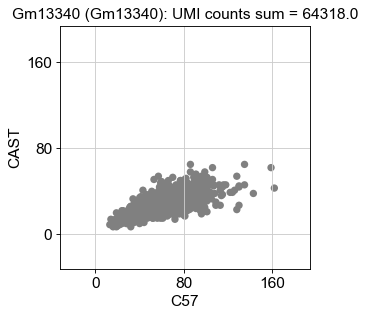

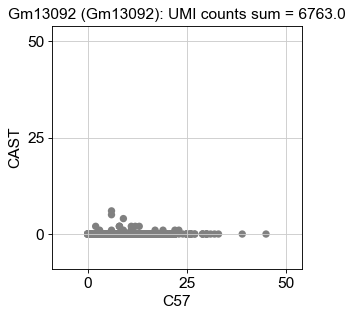

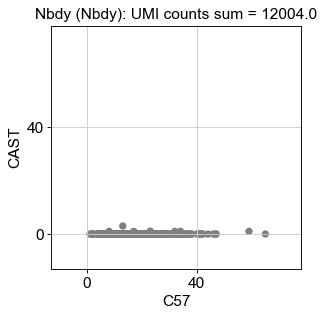

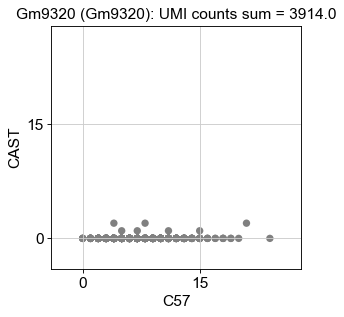

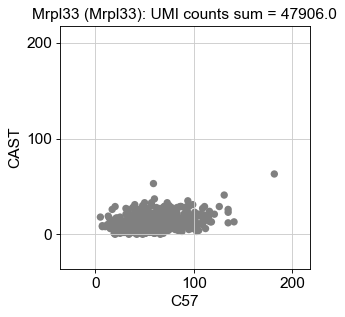

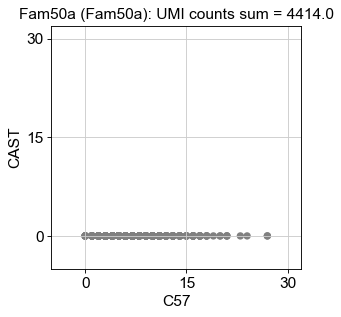

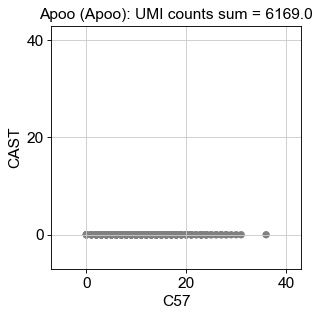

In [39]:
for x in imprinted.var_names:
#     scv.pl.scatter(imprinted, x, normalize_data= False,
#                        xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")
    utils.scatter_plot(imprinted, x, xlabel='C57', ylabel='CAST')

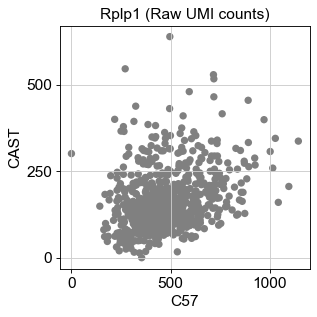

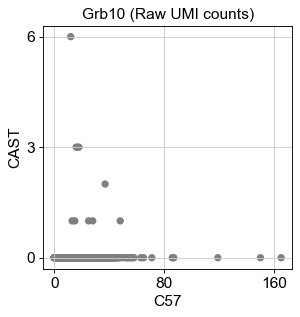

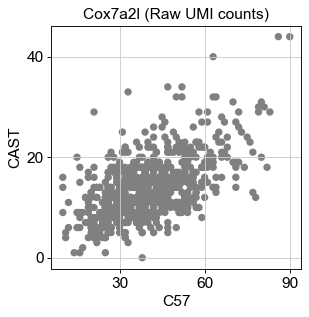

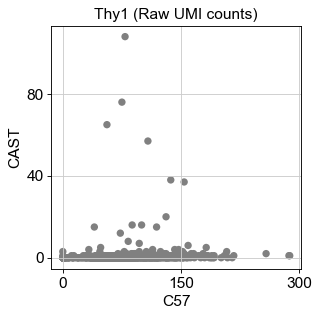

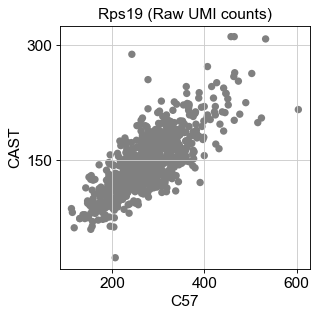

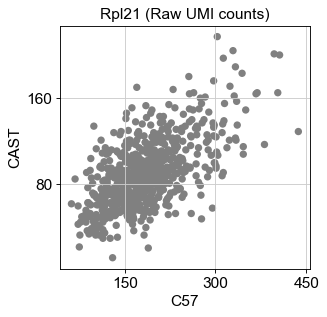

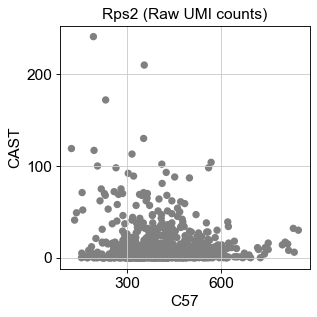

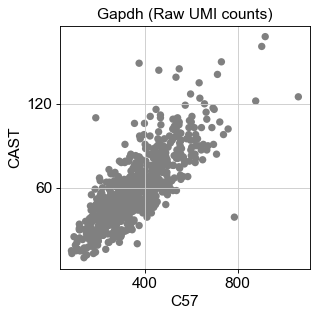

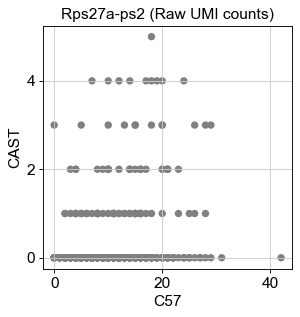

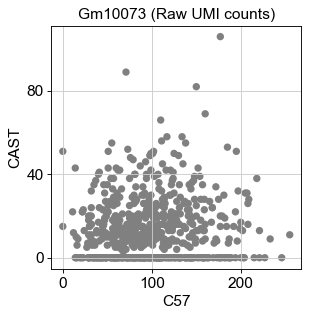

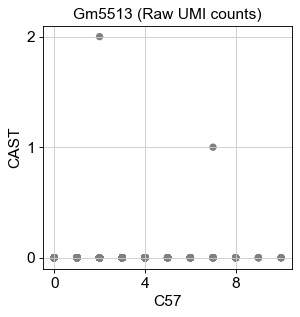

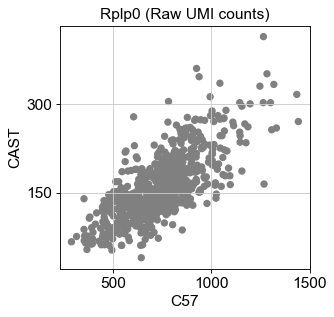

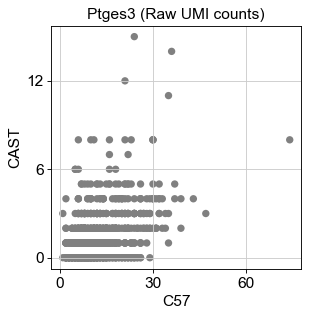

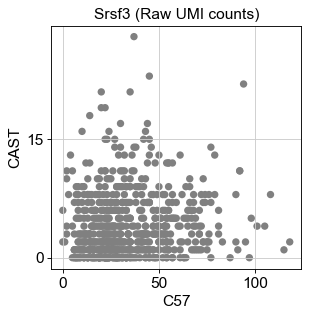

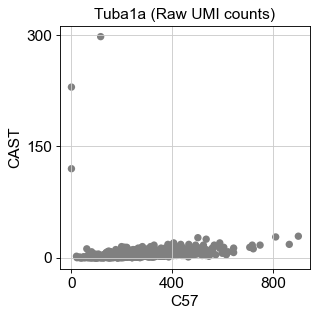

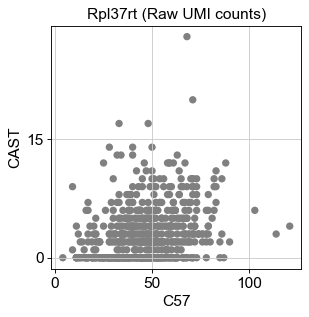

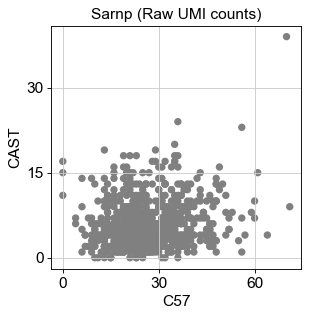

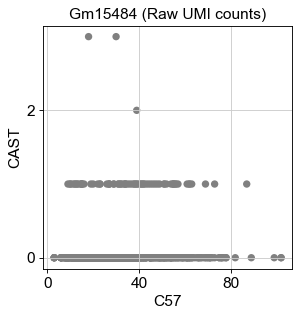

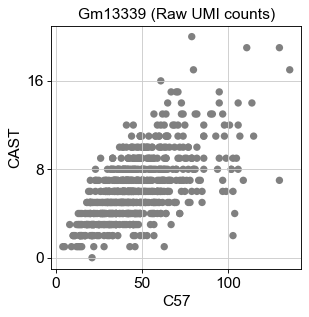

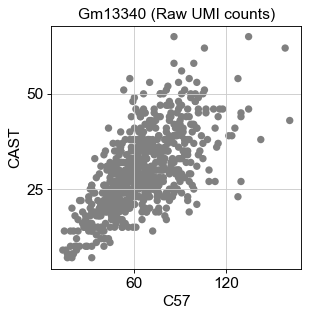

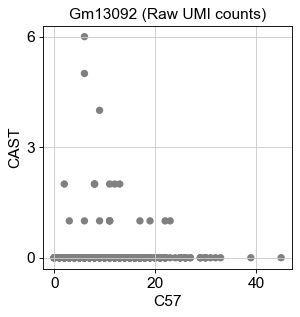

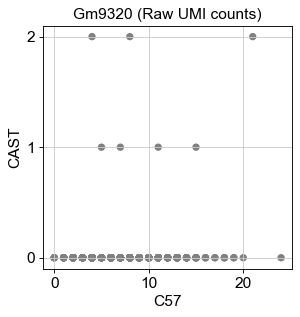

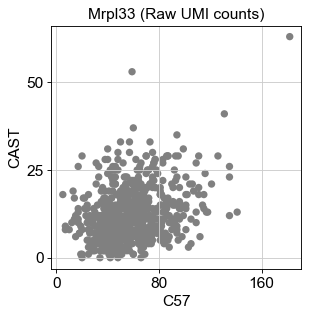

In [40]:
for x in imprinted2.var_names:
    scv.pl.scatter(imprinted2, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

In [41]:
df = pd.read_csv('data/imprinted_genes_gene_imprint.csv', sep='\t')
df.index = df.Gene
df['gene_name']= df.Gene
df

,Gene,Aliases,Location,Status,Expressed Allele,gene_name
Gene,,,,,,
Znf597,Znf597,,16 AS,Not Imprinted,Biallelic,Znf597
Zdbf2,Zdbf2,"4930431J08Rik, 9330107J05Rik, RP23-434D24.2",1,Imprinted,Paternal,Zdbf2
Gpr1,Gpr1,,1 AS,Imprinted,Paternal,Gpr1
Mir296,Mir296,"Mirn296, mmu-mir-296",2 AS,Imprinted,Paternal,Mir296
Mcts2,Mcts2,"PSIMCT-1, RP23-35I8.12, 2400002F11Rik",2,Imprinted,Paternal,Mcts2
...,...,...,...,...,...,...
Tsix,Tsix,antisense of Xist,X 42.0 cM,Imprinted,Maternal,Tsix
Jpx,Jpx,"Enox, 2010000I03Rik, 2510040I06Rik",X 46.17 cM,Imprinted,Paternal,Jpx
Ftx,Ftx,"Thcytx, BB219131, NCRNA00182, B230206F22Rik",X 46.21 cM AS,Imprinted,Paternal,Ftx


In [42]:
# Add the imprinting information to adata.var
adata3.var = adata3.var.merge(df,on='gene_name', how='left')
adata.var = adata.var.merge(df,on='gene_name', how='left')

In [44]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,...,class_label,predicted_class,UMI_counts_per_gene,UMI_log_counts_per_gene,class_label_colors,Gene,Aliases,Location,Status,Expressed Allele
0,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,...,0,0,18980.0,9.851141,#1f77b4,Gnai3,"Gnai-3, AI158965, AW537698",3 48.8 cM AS,Predicted,Maternal
1,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,...,3,3,94.0,4.543295,#d62728,NaN,NaN,NaN,NaN,NaN
2,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,...,0,3,14542.0,9.584796,#1f77b4,NaN,NaN,NaN,NaN,NaN
3,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,...,2,2,4.0,1.386294,#279e68,NaN,NaN,NaN,NaN,NaN
4,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,...,0,3,69208.0,11.144872,#1f77b4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,2,2,2.0,0.693147,#279e68,NaN,NaN,NaN,NaN,NaN
3130,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,2,2,2.0,0.693147,#279e68,NaN,NaN,NaN,NaN,NaN
3131,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,...,2,2,6.0,1.791759,#279e68,NaN,NaN,NaN,NaN,NaN
3132,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,2,2,2.0,0.693147,#279e68,NaN,NaN,NaN,NaN,NaN


In [46]:
pd.crosstab(adata3.var['predict_label'], adata3.var['predict_label'])
# pd.crosstab(adata3.var['Status_y'], adata3.var['predicted_label'])

predict_label,0,1,2,3
predict_label,,,,
0,7088,0,0,0
1,0,151,0,0
2,0,0,8688,0
3,0,0,0,7343


In [47]:
pd.crosstab(adata.var['Status'], adata.var['class_label'])

class_label,0,2,3
Status,,,
Imprinted,1,2,4
Predicted,1,0,0
Tissue Dependent,0,1,0


In [48]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,...,class_label,predicted_class,UMI_counts_per_gene,UMI_log_counts_per_gene,class_label_colors,Gene,Aliases,Location,Status,Expressed Allele
0,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,...,0,0,18980.0,9.851141,#1f77b4,Gnai3,"Gnai-3, AI158965, AW537698",3 48.8 cM AS,Predicted,Maternal
1,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,...,3,3,94.0,4.543295,#d62728,NaN,NaN,NaN,NaN,NaN
2,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,...,0,3,14542.0,9.584796,#1f77b4,NaN,NaN,NaN,NaN,NaN
3,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,...,2,2,4.0,1.386294,#279e68,NaN,NaN,NaN,NaN,NaN
4,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,...,0,3,69208.0,11.144872,#1f77b4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,2,2,2.0,0.693147,#279e68,NaN,NaN,NaN,NaN,NaN
3130,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,2,2,2.0,0.693147,#279e68,NaN,NaN,NaN,NaN,NaN
3131,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,...,2,2,6.0,1.791759,#279e68,NaN,NaN,NaN,NaN,NaN
3132,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,...,2,2,2.0,0.693147,#279e68,NaN,NaN,NaN,NaN,NaN


In [49]:
pd.crosstab(adata3.var['chromosome'], adata3.var['predict_label'])

predict_label,0,1,2,3
chromosome,,,,
1,398,0,672,493
2,592,2,552,517
3,356,0,504,401
4,474,1,459,404
5,481,5,659,518
6,335,1,506,405
7,529,1,637,594
8,425,1,454,351
9,429,3,479,427


In [50]:
pd.crosstab(adata.var['chromosome'], adata.var['class_label'])

class_label,0,1,2,3
chromosome,,,,
1,71,0,38,87
2,84,0,42,78
3,60,1,28,84
4,81,2,29,80
5,84,1,35,112
6,75,1,26,73
7,89,0,38,117
8,82,2,25,70
9,67,1,29,81


In [53]:
# set(adata3.var['Status_y'])

In [54]:
adata5 = adata3.transpose()
imprinted_list = adata5[adata5.obs['Status_y']=='Imprinted',:].copy()
imprinted_list = imprinted_list.transpose()
imprinted_list

KeyError: 'Status_y'

In [55]:
imprinted_list.var_names=imprinted_list.var['gene_name']

NameError: name 'imprinted_list' is not defined

In [ ]:
for x in imprinted_list.var_names:
    scv.pl.scatter(imprinted_list, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

In [ ]:
imprinted

In [ ]:
sc.pl.scatter(imprinted.transpose(), "UMI_log1p_counts_per_gene", 'UMI_counts_per_gene')

In [ ]:
imprinted_big = imprinted[:,imprinted.var['UMI_counts_per_gene']>100000].copy()
imprinted_big

In [ ]:
for x in imprinted_big.var_names:
    scv.pl.scatter(imprinted_big, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

# zero inflated 

In [ ]:
adata5 = adata3.transpose()
zero = adata5[adata5.obs['predict_label']=='2',:].copy()
zero = zero.transpose()
zero.var_names=zero.var['gene_name']
zero

In [ ]:
for x in zero.var_names[0:20]:
    scv.pl.scatter(zero, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

In [ ]:
sc.pl.scatter(zero.transpose(), "UMI_log1p_counts_per_gene", 'UMI_counts_per_gene')

In [ ]:
zero_big = zero[:,zero.var['UMI_log1p_counts_per_gene']>10].copy()
zero_big

In [ ]:
for x in zero_big.var_names:
    scv.pl.scatter(zero_big, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

# interesting genes 

In [ ]:
adata5 = adata3.transpose()
adata6 = adata5[adata5.obs['predict_label']=='3',:].copy()
adata6 = adata6.transpose()
adata6.var_names=adata6.var['gene_name']
adata6

In [ ]:
for x in adata6.var_names:
    scv.pl.scatter(adata6, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

In [ ]:
sc.pl.scatter(adata6.transpose(), "UMI_log1p_counts_per_gene", 'UMI_counts_per_gene')

In [ ]:
adata6_big = adata6[:,adata6.var['UMI_log1p_counts_per_gene']>10].copy()
adata6_big

In [ ]:
for x in adata6_big.var_names:
    scv.pl.scatter(adata6_big, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")